In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing #for scaling implementation

In [3]:
hdf=pd.read_csv('housing.csv')
hdf.shape[0]

545

In [4]:
hdf[:5]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<h3> Develop a ML model to predict house price
<h4> which factors affect or influence house price

In [5]:
cols=["price","area","bedrooms","stories","parking","mainroad","furnishingstatus"]
hdf=hdf[cols]

In [6]:
hdf[:4]

,price,area,bedrooms,stories,parking,mainroad,furnishingstatus
0,13300000,7420,4,3,2,yes,furnished
1,12250000,8960,4,4,3,yes,furnished
2,12250000,9960,3,2,2,yes,semi-furnished
3,12215000,7500,4,2,3,yes,furnished


In [7]:
hdf["furnishingstatus"].value_counts()#no.of unique values

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [8]:
hdf["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
hdf["mainroad"].value_counts()/hdf.shape[0]

mainroad
yes    0.858716
no     0.141284
Name: count, dtype: float64

In [10]:
#encode string code
hdf["furnishingstatus"]=hdf["furnishingstatus"].replace({'furnished':1,'semi-furnished':2,'unfurnished':3})

C:\Users\HP\AppData\Local\Temp\ipykernel_7764\945350113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hdf["furnishingstatus"]=hdf["furnishingstatus"].replace({'furnished':1,'semi-furnished':2,'unfurnished':3})


In [11]:
hdf["furnishingstatus"].value_counts()

furnishingstatus
2    227
3    178
1    140
Name: count, dtype: int64

In [12]:
hdf1=pd.read_csv('housing.csv')
cols=["price","area","bedrooms","stories","parking","mainroad","furnishingstatus"]
hdf1=hdf1[cols]

In [13]:
#one hot encoding(OHE)
hdf1[["area","furnishingstatus"]][:5]

,area,furnishingstatus
0,7420,furnished
1,8960,furnished
2,9960,semi-furnished
3,7500,furnished
4,7420,furnished


In [14]:
hdfohe=pd.get_dummies(hdf1,columns=['mainroad','furnishingstatus'])

In [15]:
hdfohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   stories                          545 non-null    int64
 4   parking                          545 non-null    int64
 5   mainroad_no                      545 non-null    bool 
 6   mainroad_yes                     545 non-null    bool 
 7   furnishingstatus_furnished       545 non-null    bool 
 8   furnishingstatus_semi-furnished  545 non-null    bool 
 9   furnishingstatus_unfurnished     545 non-null    bool 
dtypes: bool(5), int64(5)
memory usage: 24.1 KB


In [16]:
hdfohe[:5]

,price,area,bedrooms,stories,parking,mainroad_no,mainroad_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,3,2,False,True,True,False,False
1,12250000,8960,4,4,3,False,True,True,False,False
2,12250000,9960,3,2,2,False,True,False,True,False
3,12215000,7500,4,2,3,False,True,True,False,False
4,11410000,7420,4,2,2,False,True,True,False,False


In [17]:
hdfohe=pd.get_dummies(hdf1,drop_first=True,columns=['mainroad','furnishingstatus'])#first columns of each group is dropped

In [18]:
hdfohe[:5]

,price,area,bedrooms,stories,parking,mainroad_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,3,2,True,False,False
1,12250000,8960,4,4,3,True,False,False
2,12250000,9960,3,2,2,True,True,False
3,12215000,7500,4,2,3,True,False,False
4,11410000,7420,4,2,2,True,False,False


In [19]:
y=hdfohe['price']
X=hdfohe.drop('price',axis=1)#represents matrix so X is denoted in capital

In [20]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

In [21]:
Xtrain.shape

(436, 7)

<h4> SCALING

In [22]:
contcol=['area','bedrooms','stories','parking']#continuous column list

In [23]:
scaler=preprocessing.StandardScaler()#class object created
scaler.fit(Xtrain[contcol]) #calculates mean and sd for all the cont columns one at a time
Xtrain[contcol]=scaler.transform(Xtrain[contcol])
Xtest[contcol]=scaler.transform(Xtest[contcol])

In [24]:
Xtrain[:4]

,area,bedrooms,stories,parking,mainroad_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,0.384168,0.055271,2.587644,0.367957,True,False,False
93,0.929181,0.055271,-0.912499,2.709987,True,True,False
335,-0.607755,-1.283514,-0.912499,1.538972,True,False,False
412,-1.155492,0.055271,0.254215,-0.803059,True,False,True


<h4> BUILDING BASE MODEL(TAKING ALL COLUMNS)

In [25]:
model=linear_model.LinearRegression()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)
print("TRAINING METRICS")
print("==================")
print("RMSE",np.sqrt(metrics.mean_squared_error(ytrain,predtrain)))
print("R.SQUARED",metrics.r2_score(ytest,predtest))
print("TEST METRICS")
print("==================")
print("RMSE",np.sqrt(metrics.mean_squared_error(ytest,predtest)))
print("R.SQUARED",metrics.r2_score(ytrain,predtrain))

TRAINING METRICS
RMSE 1222900.7579182305
R.SQUARED 0.5131776814861998
TEST METRICS
RMSE 1568654.712300867
R.SQUARED 0.5149867157589599


In [26]:
ytrain.mean()#mean is 47L while rmse is 12L, too bad

np.float64(4706527.385321101)

C:\Users\HP\AppData\Local\Temp\ipykernel_7764\4058172726.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainerr,hist=False)


<Axes: xlabel='price', ylabel='Density'>

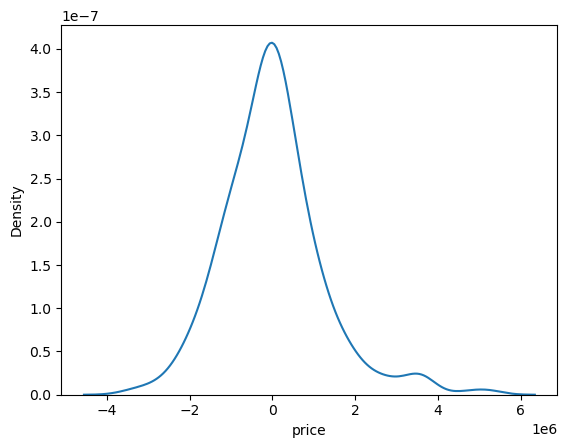

In [27]:
trainerr=ytrain-predtrain
sns.distplot(trainerr,hist=False)
#checkinf for bell curve-> if bell curve then  lr is applied

Text(0.5, 0, 'PREDICTED VALUE')

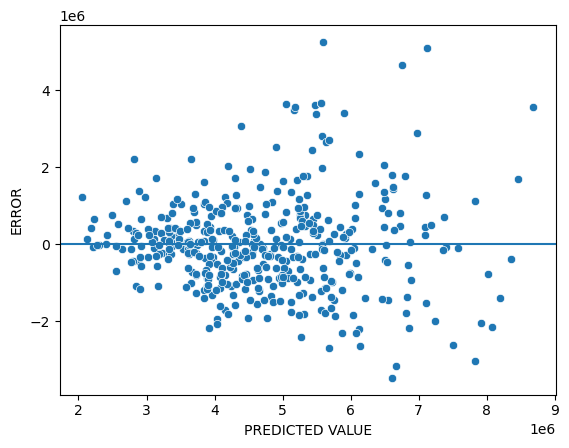

In [28]:
sns.scatterplot(x=predtrain,y=trainerr)
plt.axhline(y=0)
plt.ylabel("ERROR")
plt.xlabel("PREDICTED VALUE")

In [29]:
#the scatter plot is not homoscadastic , it's funnel shape, therefore lp cannot be used